<a href="https://colab.research.google.com/github/Stebo5/MLZaliczenie1/blob/main/TitanicHomework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [881]:
import pandas as pd
dataset_url = \
  r'https://github.com/Stebo5/MLZaliczenie1/blob/main/titanic.csv?raw=true'
df = pd.read_csv(dataset_url)

# Analiza Danych

In [882]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [883]:
df.columns.values

array(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home_dest'],
      dtype=object)

In [884]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [885]:
df.describe(include=['O'])

,name,sex,ticket,cabin,embarked,boat,home_dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,929,186,3,27,369
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


In [886]:
(df.survived == 1).sum() / len(df)

0.3819709702062643

Z opisu danych można dokonać pewnych obserwacji i założeń:
- dane w kolumnie 'name' są trudne do sformalizowania
- mały odsetek seniorów
- duża rozbieżność w kolumnie 'fare'
- znaczna część pasażerów podróżowała samotnie

In [887]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home_dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [888]:
df.cabin.isnull().sum() / len(df)

0.774637127578304

In [889]:
df.home_dest.isnull().sum() / len(df)

0.43086325439266615

In [890]:
len(df.ticket.unique()) / len(df)

0.7097020626432391

Kolumna 'cabin' jest wysoce niekompletna, podobnie kolumna 'home_dest'.

Obie kolumny nie wnoszą na tyle istotnych informacji aby uzasadnić ich zachowanie, dlatego są kandydatami do usunięcia.

Kolumna 'ticket' zawiera duplikaty oraz nie jest istotna w analizie i zostanie usunięta.

Kolumny 'boat' i 'body', które mogą doprowadzić do wycieku informacji, również zostaną usunięte.

Z istotnych kolumn, 'age', 'fare', 'cabin' oraz 'embarked' zawierają brakujące wartości, które zostaną uzupełnione.

# Feature Engineering

Zostanie stworzona zmienna 'title'.

In [891]:
df['title'] = df.name.str.split('[,.]').str[1].str.strip()
df.title.unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

W celu uzupełnienia danych wieku zostaną stworzone pewne grupy, dla których zostanie obliczona średnia. Oto kilka przykładowych konfiguracji:

In [892]:
# Kobiety o tytule Miss
miss_age = df[df.title == 'Miss'].age.mean()
miss_age

21.774206666666664

In [893]:
# Mężczyżni o tytule Master
master_age = df[df.title == 'Master'].age.mean()
master_age

5.482703773584906

In [894]:
# Mężczyżni o tytule Dr
male_dr_age = df[(df.title == 'Dr') & (df.sex == 'male')].age.mean()
male_dr_age

42.666666666666664

In [895]:
# Uzupełnienie wieku przykładami
df.loc[(df.title == 'Miss') & df.age.isnull(), 'age'] = miss_age
df.loc[(df.title == 'Master') & df.age.isnull(), 'age'] = master_age
df.loc[(df.title == 'Dr') & (df.sex == 'male') & df.age.isnull(), 'age'] = male_dr_age

In [896]:
# Kilka dodatkowych tutułów
for title in ['Sir', 'Mr', 'Ms', 'Mrs']:
  df.loc[(df.title == title) & df.age.isnull(), 'age'] = df[df.title == title].age.mean()

In [897]:
# Uzupełnienie pozostałych średnią dla płci
for sex in ['male', 'female']:
  df.loc[(df.sex == sex) & df.age.isnull(), 'age'] = df[df.sex == sex].age.mean()

Posiadając atrybut 'title', atrybut 'name' nie wnosi żadnej wartości do zbioru danych, więc można go usunąć.

In [898]:
df.drop('name', axis=1, inplace=True)
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest,title
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs


Należy również usunąć atrybuty 'cabin', 'boat' ,'body', 'ticket' oraz 'home_dest' z wymienionych wyżej powodów.

In [899]:
df.drop(['cabin', 'boat', 'body', 'ticket', 'home_dest'], axis=1, inplace=True)
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,title
0,1,1,female,29.0000,0,0,211.3375,S,Miss
1,1,1,male,0.9167,1,2,151.5500,S,Master
2,1,0,female,2.0000,1,2,151.5500,S,Miss
3,1,0,male,30.0000,1,2,151.5500,S,Mr
4,1,0,female,25.0000,1,2,151.5500,S,Mrs


In [900]:
# Zmienna rozmiaru rodziny
df['family_size'] = df.parch + df.sibsp + 1
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,title,family_size
0,1,1,female,29.0000,0,0,211.3375,S,Miss,1
1,1,1,male,0.9167,1,2,151.5500,S,Master,4
2,1,0,female,2.0000,1,2,151.5500,S,Miss,4
3,1,0,male,30.0000,1,2,151.5500,S,Mr,4
4,1,0,female,25.0000,1,2,151.5500,S,Mrs,4


Posiadając 'family_size', 'sibsp' oraz 'parch' nie są już potrzebne.

In [901]:
df.drop(['sibsp', 'parch'], axis=1, inplace=True)
df.head()

,pclass,survived,sex,age,fare,embarked,title,family_size
0,1,1,female,29.0000,211.3375,S,Miss,1
1,1,1,male,0.9167,151.5500,S,Master,4
2,1,0,female,2.0000,151.5500,S,Miss,4
3,1,0,male,30.0000,151.5500,S,Mr,4
4,1,0,female,25.0000,151.5500,S,Mrs,4


In [902]:
import numpy as np
# Zmienna przedziału wieku
age_categories = ['baby', 'kid', 'teen', 'adult']
ages = [0, 6, 12, 18, np.inf]
df['age_range'] = pd.cut(df.age, bins=ages, labels=age_categories, right=False)
df.head()

,pclass,survived,sex,age,fare,embarked,title,family_size,age_range
0,1,1,female,29.0000,211.3375,S,Miss,1,adult
1,1,1,male,0.9167,151.5500,S,Master,4,baby
2,1,0,female,2.0000,151.5500,S,Miss,4,baby
3,1,0,male,30.0000,151.5500,S,Mr,4,adult
4,1,0,female,25.0000,151.5500,S,Mrs,4,adult


In [903]:
# Zmienna uwypuklająca szanse przeżycia dzieci i osób z pierwszej klasy
df['mpc'] = df.age * df.pclass
df.mpc.head()

0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
Name: mpc, dtype: float64

# Edycja metadanych

In [904]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pclass       1309 non-null   int64   
 1   survived     1309 non-null   int64   
 2   sex          1309 non-null   object  
 3   age          1309 non-null   float64 
 4   fare         1308 non-null   float64 
 5   embarked     1307 non-null   object  
 6   title        1309 non-null   object  
 7   family_size  1309 non-null   int64   
 8   age_range    1309 non-null   category
 9   mpc          1309 non-null   float64 
dtypes: category(1), float64(3), int64(3), object(3)
memory usage: 93.6+ KB


Należy przekształcić niektóre zmienne na kategoryczne.

In [905]:
df.pclass = df.pclass.astype('category')
df.embarked = df.embarked.astype('category')
df.sex = df.sex.astype('category')
df.survived = df.survived.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pclass       1309 non-null   category
 1   survived     1309 non-null   category
 2   sex          1309 non-null   category
 3   age          1309 non-null   float64 
 4   fare         1308 non-null   float64 
 5   embarked     1307 non-null   category
 6   title        1309 non-null   object  
 7   family_size  1309 non-null   int64   
 8   age_range    1309 non-null   category
 9   mpc          1309 non-null   float64 
dtypes: category(5), float64(3), int64(1), object(1)
memory usage: 58.3+ KB


# Uzupełnienie brakujących danych

In [906]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pclass       1309 non-null   category
 1   survived     1309 non-null   category
 2   sex          1309 non-null   category
 3   age          1309 non-null   float64 
 4   fare         1308 non-null   float64 
 5   embarked     1307 non-null   category
 6   title        1309 non-null   object  
 7   family_size  1309 non-null   int64   
 8   age_range    1309 non-null   category
 9   mpc          1309 non-null   float64 
dtypes: category(5), float64(3), int64(1), object(1)
memory usage: 58.3+ KB


Pozostało uzupełnienie 'fare' oraz 'embarked'.

In [907]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(random_state=0)
df.fare = imp.fit_transform(df[['fare']])

In [908]:
df.embarked.fillna(df.embarked.mode()[0], inplace=True)

In [909]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pclass       1309 non-null   category
 1   survived     1309 non-null   category
 2   sex          1309 non-null   category
 3   age          1309 non-null   float64 
 4   fare         1309 non-null   float64 
 5   embarked     1309 non-null   category
 6   title        1309 non-null   object  
 7   family_size  1309 non-null   int64   
 8   age_range    1309 non-null   category
 9   mpc          1309 non-null   float64 
dtypes: category(5), float64(3), int64(1), object(1)
memory usage: 58.3+ KB


# Przycięcie odstających wartości

Należy przyjrzeć się danym numerycznym w celu znalezienia odstających wartości.

<Axes: xlabel='age', ylabel='age'>

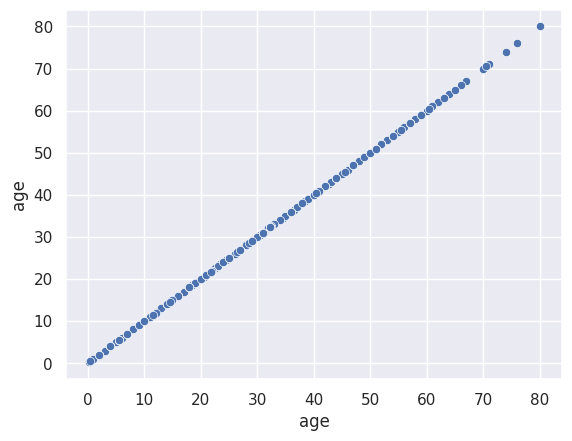

In [910]:
import seaborn as sns
sns.set()
sns.scatterplot(data=df, x='age', y='age')

<Axes: xlabel='fare', ylabel='fare'>

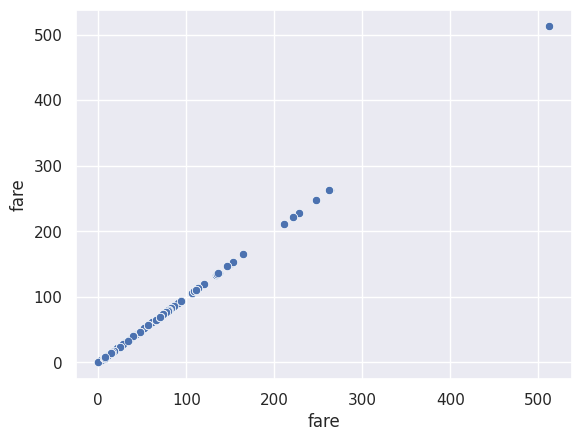

In [911]:
sns.scatterplot(data=df, x='fare', y='fare')

<Axes: xlabel='family_size', ylabel='family_size'>

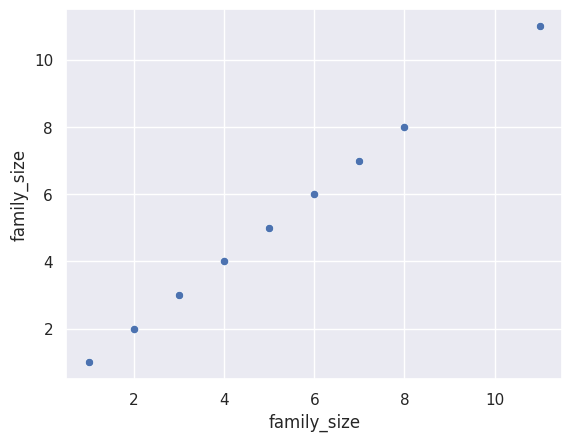

In [912]:
sns.scatterplot(data=df, x='family_size', y='family_size')

<Axes: xlabel='mpc', ylabel='mpc'>

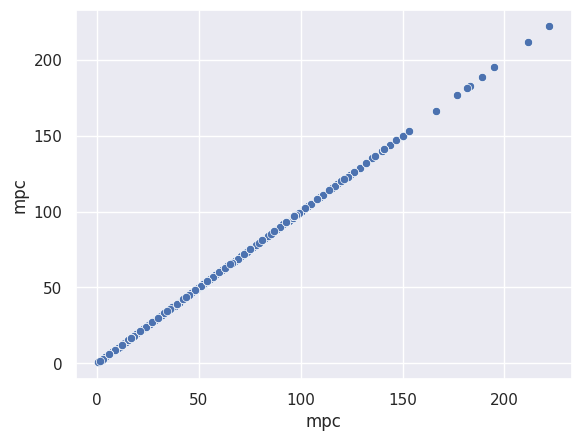

In [913]:
sns.scatterplot(data=df, x='mpc', y='mpc')

Strategia przycinania będzie polegać na zastąpieniu średnią. Dla poszczególnych atrybutów kryteria wyglądają następująco:
- wiek powyżej 67 lat
- cena biletu powyżej 200$
- rozmiar rodziny powyżej 8
- mpc powyżej 152

In [914]:
for attr, cut in zip(('age', 'fare', 'family_size', 'mpc'), (67, 200, 8, 152)):
  df.loc[df[attr] > cut, attr] = df[attr].mean()
df.describe()

,age,fare,family_size,mpc
count,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.633915,26.520179,1.807275,63.462490
std,12.753627,28.807908,1.342816,30.488905
min,0.166700,0.000000,1.000000,0.500100
25%,21.774207,7.895800,1.000000,42.000000
50%,30.000000,14.454200,1.000000,63.000000
75%,36.000000,31.275000,2.000000,88.000000
max,67.000000,164.866700,8.000000,150.000000


# Normalizacja danych numerycznych

Po przycięciu wartości odstających można polegać na użyciu StandardScaler.

In [915]:
from sklearn.preprocessing import StandardScaler
numeric = df.select_dtypes(include='number')
df.drop(numeric.columns, inplace=True, axis=1)
scaled = pd.DataFrame(StandardScaler().fit_transform(numeric), index=numeric.index, columns=numeric.columns)

In [916]:
df = pd.concat([df, scaled], axis=1)
df.head()

,pclass,survived,sex,embarked,title,age_range,age,fare,family_size,mpc
0,1,1,female,S,Miss,adult,-0.049724,0.235279,-0.601410,-1.130761
1,1,1,male,S,Master,baby,-2.252551,4.341780,1.633554,-2.052212
2,1,0,female,S,Miss,baby,-2.167578,4.341780,1.633554,-2.016667
3,1,0,male,S,Mr,adult,0.028715,4.341780,1.633554,-1.097950
4,1,0,female,S,Mrs,adult,-0.363480,4.341780,1.633554,-1.262006


# Zakodowanie danych kategorycznych

In [917]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pclass       1309 non-null   category
 1   survived     1309 non-null   category
 2   sex          1309 non-null   category
 3   embarked     1309 non-null   category
 4   title        1309 non-null   object  
 5   age_range    1309 non-null   category
 6   age          1309 non-null   float64 
 7   fare         1309 non-null   float64 
 8   family_size  1309 non-null   float64 
 9   mpc          1309 non-null   float64 
dtypes: category(5), float64(4), object(1)
memory usage: 58.3+ KB


In [918]:
# Zakodowanie binarnych danych LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.survived = le.fit_transform(df.survived)
df.sex = le.fit_transform(df.sex)

In [919]:
# Zakodowanie tytułu, klasy i zakresu wieku OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
titles = [['Miss', 'Master', 'Mrs', 'Mr', 'Lady', 'Sir', 'Major', 'Col', 'Capt']]
df.title = OrdinalEncoder(categories=titles,
                          handle_unknown='use_encoded_value',
                          unknown_value=9,
                          dtype='uint8').fit_transform(df[['title']])
df.pclass = OrdinalEncoder(dtype='uint8').fit_transform(df[['pclass']])
ages = [['baby', 'kid', 'teen', 'adult']]
df.age_range = OrdinalEncoder(categories=ages, dtype='uint8').fit_transform(df[['age_range']])

In [920]:
# Zakodowanie portu dummies
df = pd.get_dummies(df, columns=['embarked'])

In [921]:
df.head()

,pclass,survived,sex,title,age_range,age,fare,family_size,mpc,embarked_C,embarked_Q,embarked_S
0,0,1,0,0,3,-0.049724,0.235279,-0.601410,-1.130761,0,0,1
1,0,1,1,1,0,-2.252551,4.341780,1.633554,-2.052212,0,0,1
2,0,0,0,0,0,-2.167578,4.341780,1.633554,-2.016667,0,0,1
3,0,0,1,3,3,0.028715,4.341780,1.633554,-1.097950,0,0,1
4,0,0,0,2,3,-0.363480,4.341780,1.633554,-1.262006,0,0,1


# Stworzenie modeli

Jako klasyfikatory zostały wybrane Random Forest Classifier, Support Vector Machines (SVM) oraz Logistic Regression.

In [922]:
# Wyodrębnienie zmiennej celu
X = df.drop('survived', axis=1)
y = df.survived

In [923]:
# Podział na dane treningowe i testowe
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [924]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
cls = [RandomForestClassifier(random_state=0),
               LogisticRegression(random_state=0),
               SVC(random_state=0, probability=True)]
for c in cls:
  c.fit(X_train, y_train)

# Ocena wydajności

### Przy pomocy macierzy pomyłek

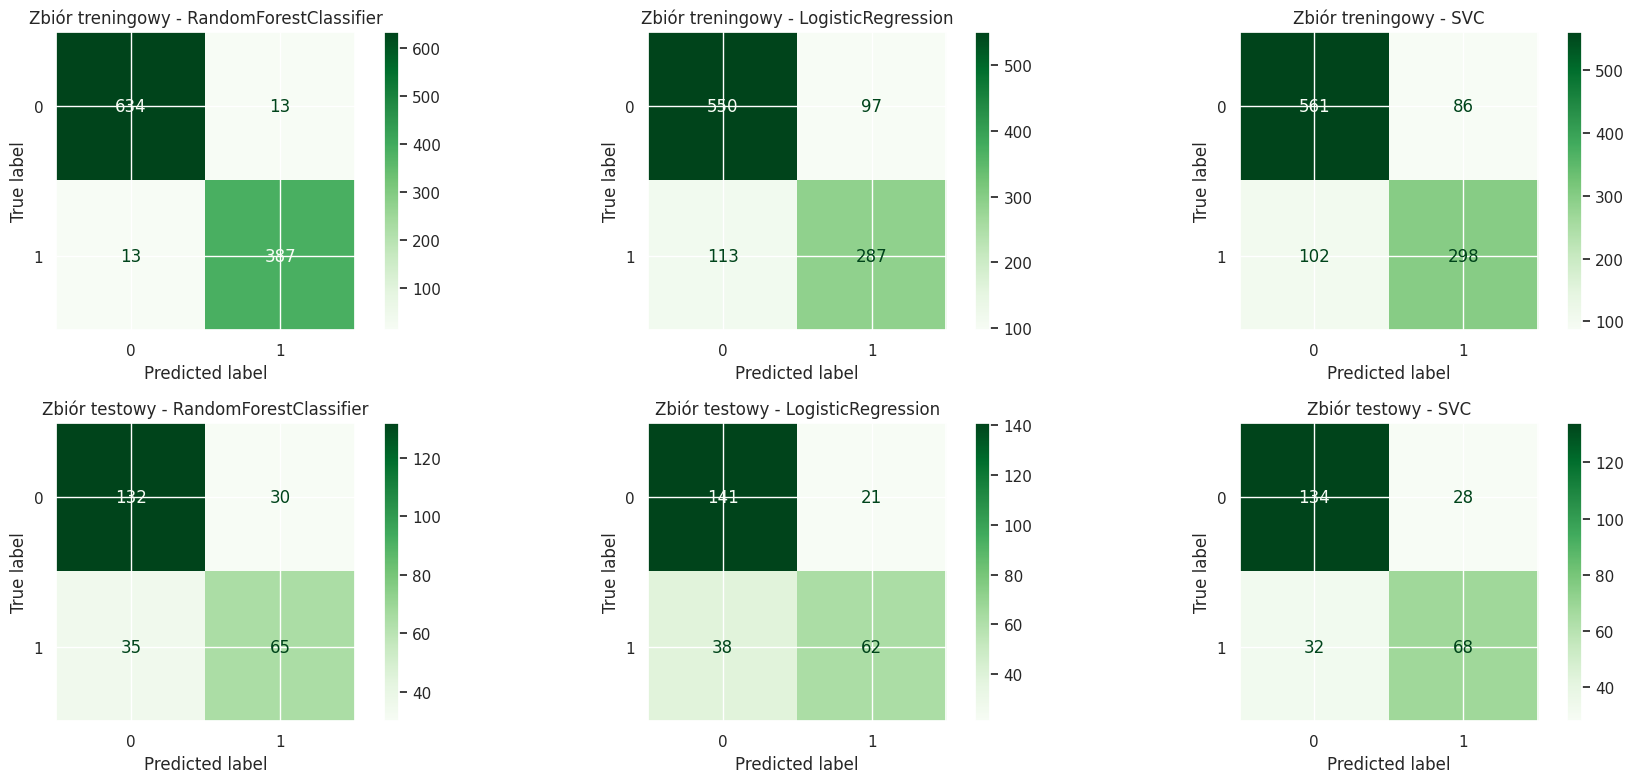

In [925]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def compare_cm(X_train, X_test, y_train, y_test):
  fig, axes = plt.subplots(2, 3, figsize=(18, 8))
  for i, c in enumerate(cls):
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    name = type(c).__name__

    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)

    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0, 1])
    disp_train.plot(ax=axes[0][i], cmap='Greens')
    axes[0][i].set_title(f'Zbiór treningowy - {name}')

    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
    disp_test.plot(ax=axes[1][i], cmap='Greens')
    axes[1][i].set_title(f'Zbiór testowy - {name}')
  plt.tight_layout()
  plt.show()

compare_cm(X_train, X_test, y_train, y_test)

### Przy pomocy raportu klasyfikacyjnego

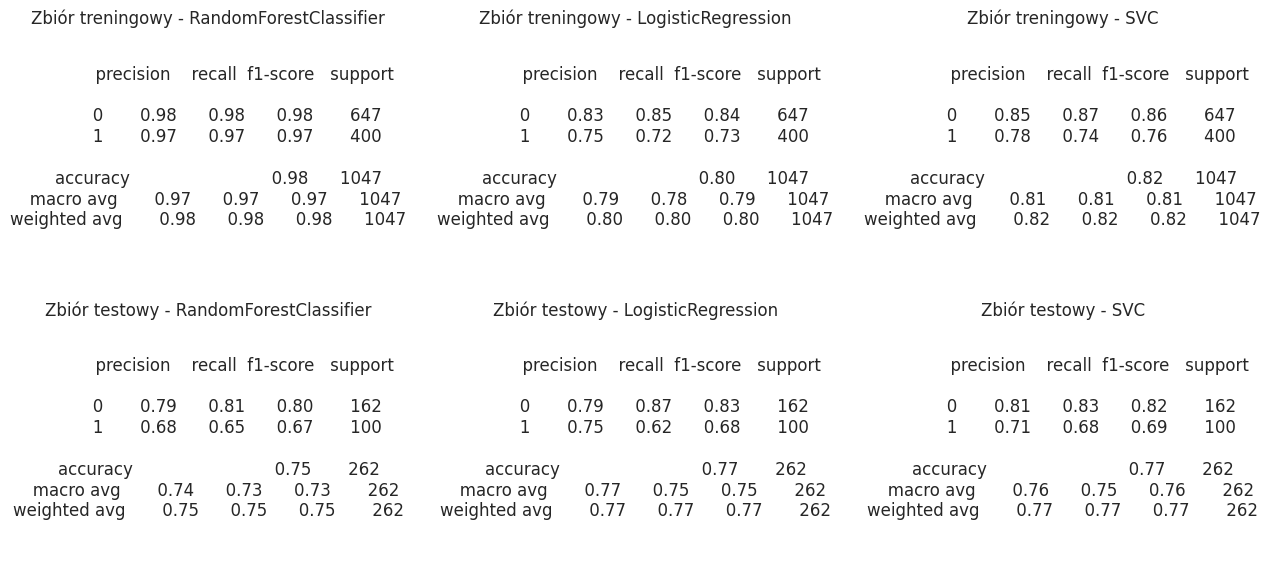

In [926]:
from sklearn.metrics import classification_report

def compare_reports(X_train, X_test, y_train, y_test):
  fig, axes = plt.subplots(2, 3, figsize=(13, 6))
  for i, c in enumerate(cls):
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    name = type(c).__name__

    axes[0][i].text(0.5, 0.5, classification_report(y_train, y_train_pred), fontsize=12, ha='center', va='center')
    axes[0][i].axis('off')
    axes[0][i].set_title(f'Zbiór treningowy - {name}')

    axes[1][i].text(0.5, 0.5, classification_report(y_test, y_test_pred), fontsize=12, ha='center', va='center')
    axes[1][i].axis('off')
    axes[1][i].set_title(f'Zbiór testowy - {name}')
  plt.tight_layout()
  plt.show()

compare_reports(X_train, X_test, y_train, y_test)

### Przy pomocy krzywej ROC

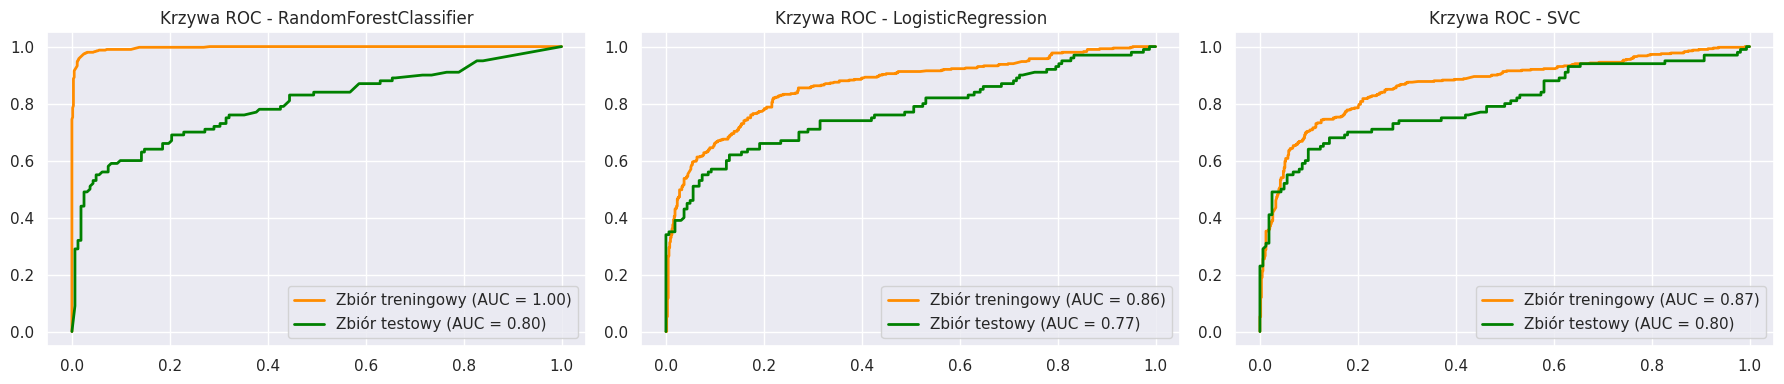

In [927]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

def compare_roc(X_train, X_test, y_train, y_test):
  fig, axes = plt.subplots(1, 3, figsize=(18, 4))
  for i, c in enumerate(cls):
    y_train_proba = c.predict_proba(X_train)
    y_test_proba = c.predict_proba(X_test)
    name = type(c).__name__

    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba[:, 1])
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba[:, 1])

    roc_auc_train = auc(fpr_train, tpr_train)
    roc_auc_test = auc(fpr_test, tpr_test)

    axes[i].plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Zbiór treningowy (AUC = {roc_auc_train:.2f})')
    axes[i].plot(fpr_test, tpr_test, color='green', lw=2, label=f'Zbiór testowy (AUC = {roc_auc_test:.2f})')

    axes[i].set_title(f'Krzywa ROC - {name}')

    axes[i].legend()
  plt.tight_layout()
  plt.show()

compare_roc(X_train, X_test, y_train, y_test)

Wszystkie klasyfikatory miały podobne wyniki, poza metodą losowych drzew, która miała niepokojąco wysoki wynik na zbiorze treningowym, co może sugerować nadmierne dopasowanie. Mimo to, wynik na zbiorze testowym jest zadowalający.

# Zastosowanie metody SMOTE

Jako ostatnia próba poprawienia działania modeli jest zastosowanie SMOTE w celu zbalansowania zbioru danych.

In [928]:
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE(random_state=0).fit_resample(X, y)

In [929]:
X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(X_res, y_res, test_size=0.2)

In [930]:
cls = [RandomForestClassifier(random_state=0),
               LogisticRegression(random_state=0),
               SVC(random_state=0, probability=True)]
for c in cls:
  c.fit(X_res_train, y_res_train)

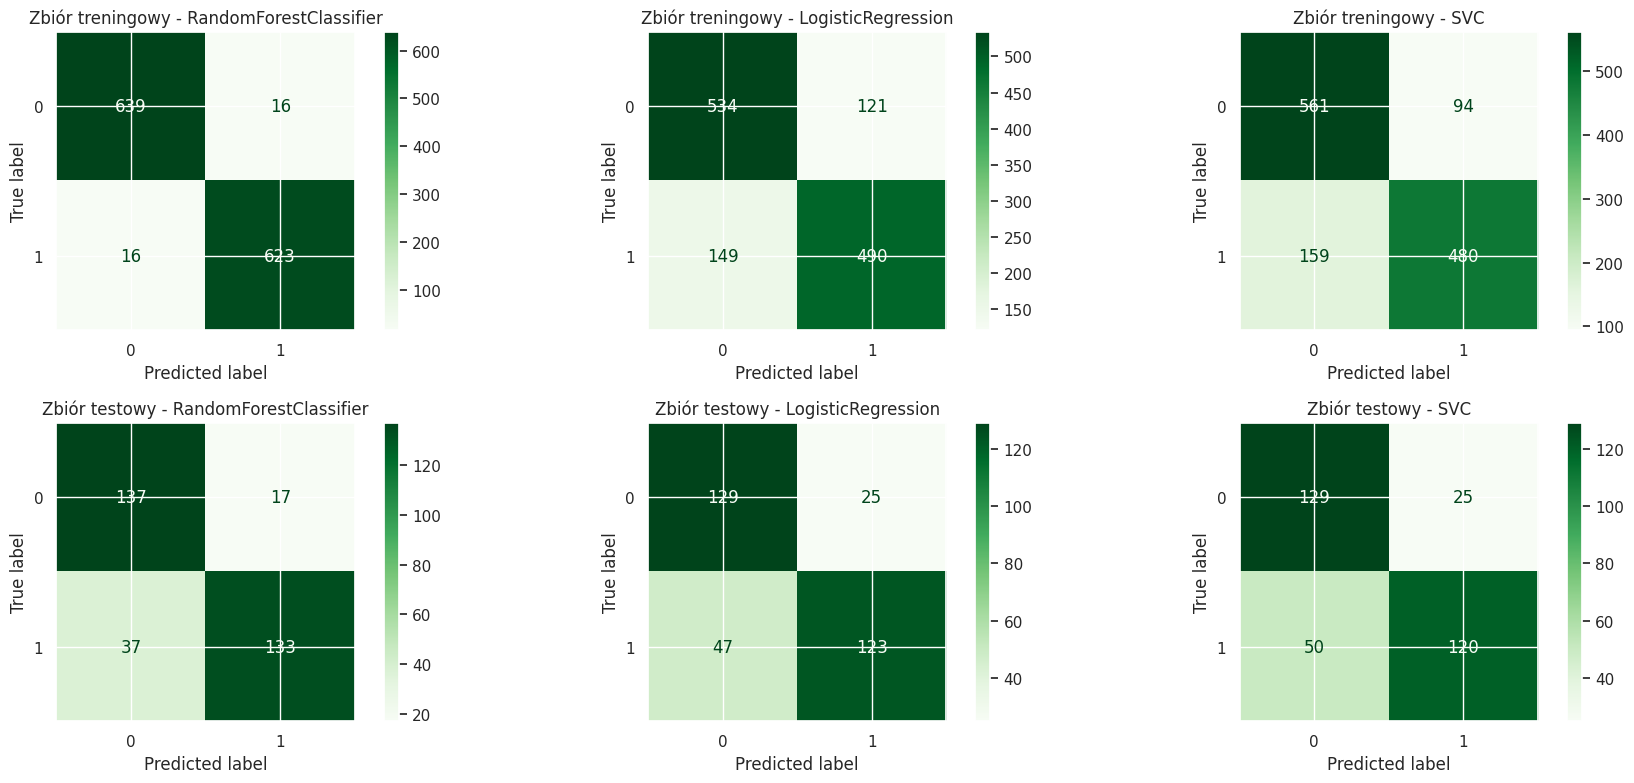

In [931]:
compare_cm(X_res_train, X_res_test, y_res_train, y_res_test)

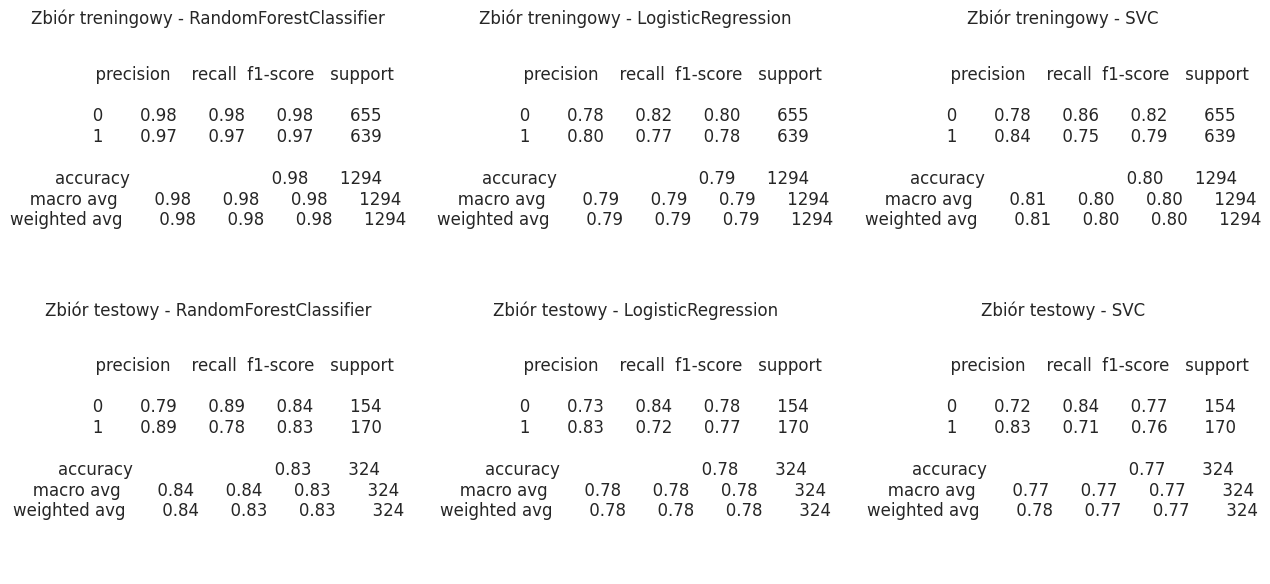

In [932]:
compare_reports(X_res_train, X_res_test, y_res_train, y_res_test)

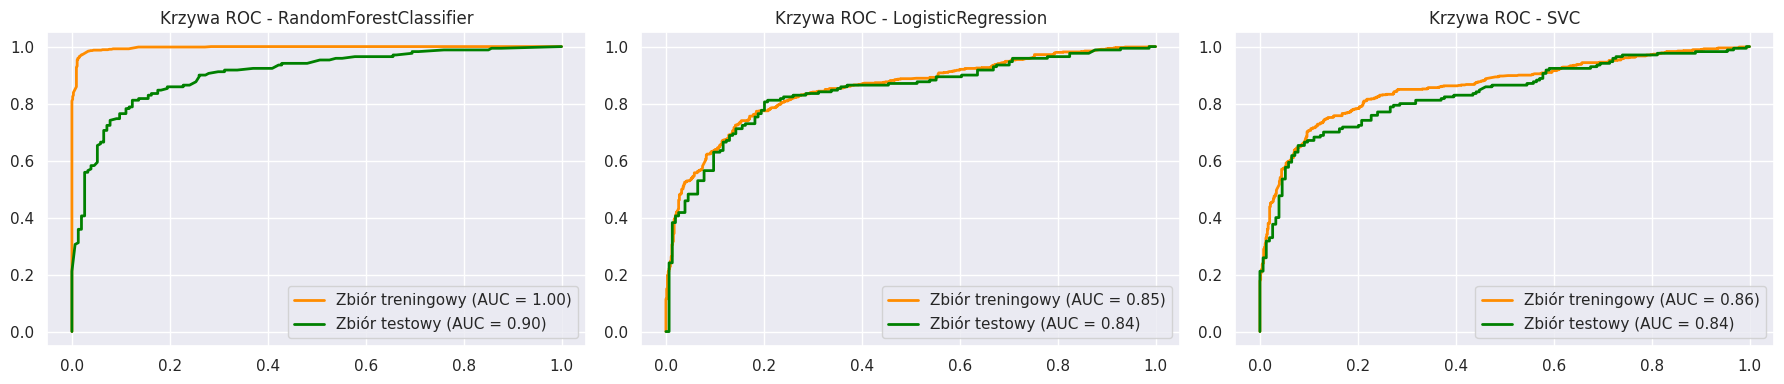

In [933]:
compare_roc(X_res_train, X_res_test, y_res_train, y_res_test)

Wygląda na to, że resampling nieznacznie poprawił działanie modeli, dlatego można zakończyć pracę nad projektem.